In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
import pandas as pd

df= pd.read_csv(r"C:\Users\barta\Documents\cours\iaprojets\projet_aa\part_1\data\raw\recommendation_spotify.csv")

In [68]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import ast


class MusicFeatureEngineering():
    def __init__(self):
        self.min_date_ = None

    def fit(self, X, y=None):
        self.min_date_ =  pd.Timestamp('1900-01-01')
        return self

    def transform(self, X):
        X_copy = X.copy()
        
        X_copy['release_date'] = pd.to_datetime(X_copy['release_date'], format='mixed')
        X_copy['days_since_1st_date'] = (X_copy['release_date'] - self.min_date_).dt.days

        cols_to_drop = ['release_date','id','name','year']
        X_copy = X_copy.drop(columns=[c for c in cols_to_drop if c in X_copy.columns])
        numeric_features = X_copy.select_dtypes(include=[np.number]).columns.tolist()
        print (numeric_features)
        categorical_features = X_copy.select_dtypes(include=['object', 'category','bool']).columns.tolist()
        # Encoder chaque feature catégorique
        label_encoders = {}
        for col in categorical_features:
            le = LabelEncoder()
            X_copy[col] = le.fit_transform(X_copy[col].astype(str))
            label_encoders[col] = le
        return X_copy

X = df

pipeline_X = Pipeline([
    ('feature_eng', MusicFeatureEngineering())])

X_processed = pipeline_X.fit_transform(X)
X_processed.head()

['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'days_since_1st_date']


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,days_since_1st_date
0,0.991000,21071,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,7304
1,0.643000,303,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,7308
2,0.993000,21071,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,7304
3,0.000173,24517,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,7304
4,0.295000,22782,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,7578


In [71]:
X_processed.shape # parfait, j'ai retiré 'id','name','year'

(174389, 16)

### 1. Propose a method that returns a playlist (approx. 10 songs) given a song (or a list of songs).

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)
model_knn = NearestNeighbors(n_neighbors=11, metric='euclidean')
model_knn.fit(X_scaled)

import numpy as np

def indices_to_songs(song_indices):
    return X_scaled[song_indices]

def get_playlist_from_list(song_vector, n_recommendations=10):
    """
    Prend une liste de sons
    Retourne les indices des 10 sons les plus proches de la moyenne de cette liste
    """
    if hasattr(song_vector, 'values'):
        song_vector = song_vector.values
    song_vector = np.array(song_vector, dtype=float)
    # On calcule le "vecteur moyen" 
    mean_vector = np.mean(song_vector, axis=0).reshape(1, -1)
    
    n_search = n_recommendations + len(song_vector)
    distances, indices = model_knn.kneighbors(mean_vector, n_neighbors=n_search)
    indices = indices.flatten()
    final_indices = [idx for idx in indices if idx not in song_vector]
    
    return final_indices[:n_recommendations]

ma_selection = [0, 10, 55]
indices_recommandes = get_playlist_from_list(indices_to_songs(ma_selection))

print(f"Sons recommandés pour votre sélection : {indices_recommandes}")

playlist_df = df.iloc[indices_recommandes]

print(playlist_df[['artists', 'name']])

Sons recommandés pour votre sélection : [np.int64(21417), np.int64(22436), np.int64(20740), np.int64(2748), np.int64(23701), np.int64(21819), np.int64(59649), np.int64(724), np.int64(111136), np.int64(2742)]
                                                  artists  \
21417                            ['João Petra de Barros']   
22436                                      ['Lead Belly']   
20740                                  ['Georges Milton']   
2748                 ['Francisco Canaro', 'Carlos Galán']   
23701   ['Paco Aguilera', 'Cuadro Flamenco', 'Lola Flo...   
21819                                    ['Fred Astaire']   
59649                                    ['Fred Astaire']   
724                                       ['Mistinguett']   
111136                                  ['Kamala Jharia']   
2742                 ['Francisco Canaro', 'Ernesto Fama']   

                                         name  
21417                              Até Amanhã  
22436                   

In [73]:
#How can you extend this to take into account all users experience?
#il faudrait que le'utilisateur puisse donner les caractéristiques du son pour que cela fonctionne. S'il donne un son non connu dans la base 

In [74]:
from sklearn.model_selection import train_test_split

# test_size=0.2 signifie 80% pour l'entraînement, 20% pour le test
X_train, X_test = train_test_split(X_processed, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
model_knn = NearestNeighbors(n_neighbors=11, metric='euclidean')
model_knn.fit(X_scaled)

indices_recommandes = get_playlist_from_list(X_test)

print(f"Sons recommandés pour votre sélection : {indices_recommandes}")

playlist_df = df.iloc[indices_recommandes]

print(playlist_df[['artists', 'name']])

Sons recommandés pour votre sélection : [np.int64(121978), np.int64(70787), np.int64(18312), np.int64(86686), np.int64(94355), np.int64(78090), np.int64(106512), np.int64(26029), np.int64(6591), np.int64(46344)]
                                artists  \
121978                   ['Bobby Lyle']   
70787                   ['Ana Gabriel']   
18312       ['Kendrick Lamar', 'Drake']   
86686                    ['Black Flag']   
94355           ['Seweryn Goszczyński']   
78090      ['Tadeusz Dolega Mostowicz']   
106512                 ['Toni Braxton']   
26029                ['Oscar Peterson']   
6591    ['Percy Faith & His Orchestra']   
46344                 ['Dominic Behan']   

                                             name  
121978                              Aruban Nights  
70787                                     Hechizo  
18312                              Poetic Justice  
86686               Beat My Head Against the Wall  
94355              Chapter 2.16 - Zamek kaniowski  
78

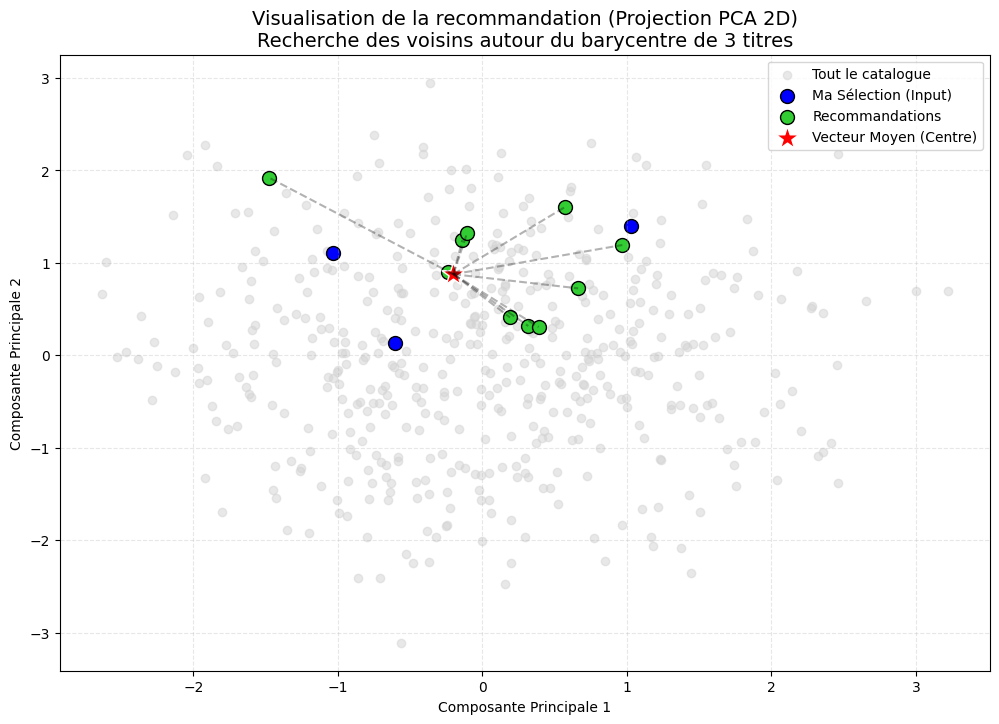

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# --- 1. GÉNÉRATION DE DONNÉES FICTIVES (Pour l'exemple) ---
# Imaginons 500 chansons avec 10 features (danceability, energy, etc.)
np.random.seed(42)
data_size = 500
n_features = 10
X_processed = np.random.rand(data_size, n_features)

# --- 2. VOTRE PIPELINE (Repris et adapté) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# On entraine le modèle sur tout le dataset
model_knn = NearestNeighbors(n_neighbors=11, metric='euclidean')
model_knn.fit(X_scaled)

# Vos indices de sélection (Input utilisateur)
ma_selection_indices = [0, 10, 55] 
vectors_selection = X_scaled[ma_selection_indices]

# Calcul du vecteur moyen (Barycentre)
mean_vector = np.mean(vectors_selection, axis=0).reshape(1, -1)

# Recherche des voisins du vecteur moyen
# On demande un peu plus de voisins pour pouvoir filtrer les originaux si besoin
distances, indices = model_knn.kneighbors(mean_vector, n_neighbors=15)
indices = indices.flatten()

# Filtrage: on garde ceux qui ne sont PAS dans la sélection d'origine
indices_recommandes = [idx for idx in indices if idx not in ma_selection_indices][:10]

# --- 3. VISUALISATION (La partie demandée) ---

# A. Réduction de dimension (10D -> 2D) pour l'affichage
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# On projette aussi le vecteur moyen dans cet espace 2D
mean_vector_pca = pca.transform(mean_vector)

# B. Création du Graphique
plt.figure(figsize=(12, 8))

# 1. Fond : Toutes les chansons (en gris clair, discret)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgrey', alpha=0.5, label='Tout le catalogue')

# 2. Input : Les chansons choisies par l'utilisateur (Bleu)
selection_pca = X_pca[ma_selection_indices]
plt.scatter(selection_pca[:, 0], selection_pca[:, 1], c='blue', s=100, edgecolors='k', label='Ma Sélection (Input)')

# 3. Output : Les recommandations (Vert)
reco_pca = X_pca[indices_recommandes]
plt.scatter(reco_pca[:, 0], reco_pca[:, 1], c='limegreen', s=100, edgecolors='k', label='Recommandations')

# 4. Le Barycentre : Le vecteur moyen calculé (Étoile Rouge)
plt.scatter(mean_vector_pca[:, 0], mean_vector_pca[:, 1], c='red', marker='*', s=300, edgecolors='white', label='Vecteur Moyen (Centre)')

# C. Esthétique : Relier le centre aux recommandations
for i in range(len(reco_pca)):
    plt.plot([mean_vector_pca[0, 0], reco_pca[i, 0]], 
             [mean_vector_pca[0, 1], reco_pca[i, 1]], 
             'k--', alpha=0.3)

plt.title(f"Visualisation de la recommandation (Projection PCA 2D)\nRecherche des voisins autour du barycentre de {len(ma_selection_indices)} titres", fontsize=14)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Sauvegarder ou afficher
plt.savefig("knn_visualization.png")
plt.show()